In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [7]:
current_path = ""

In [8]:
for cls in range(classes):
    path = os.path.join(current_path,'train',str(cls))
    images = os.listdir(path)

    for im in images:
        try:
            image = Image.open(path + '/'+ im)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(cls)
        except:
            print("Error loading image")

In [9]:
data = np.array(data)
labels = np.array(labels)

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=epochs, 
                    validation_data=(X_test, y_test))




Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 212s 7ms/step - loss: 2.1528 - accuracy: 0.4327 - val_loss: 0.7578 - val_accuracy: 0.8030
Epoch 2/10
31367/31367 [==============================] - 210s 7ms/step - loss: 0.9415 - accuracy: 0.7184 - val_loss: 0.4022 - val_accuracy: 0.8971
Epoch 3/10
31367/31367 [==============================] - 136s 4ms/step - loss: 0.6876 - accuracy: 0.7908 - val_loss: 0.2789 - val_accuracy: 0.9183
Epoch 4/10
31367/31367 [==============================] - 98s 3ms/step - loss: 0.5576 - accuracy: 0.8323 - val_loss: 0.2067 - val_accuracy: 0.9373
Epoch 5/10
31367/31367 [==============================] - 97s 3ms/step - loss: 0.4756 - accuracy: 0.8571 - val_loss: 0.1454 - val_accuracy: 0.9582
Epoch 6/10
31367/31367 [==============================] - 98s 3ms/step - loss: 0.4227 - accuracy: 0.8721 - val_loss: 0.1985 - val_accuracy: 0.9566
Epoch 7/10
31367/31367 [==============================] - 100s 3

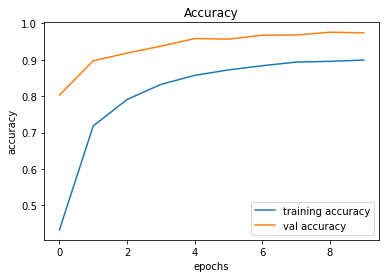

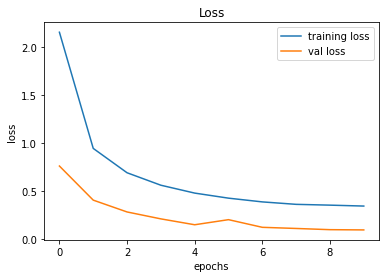

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
score = model.evaluate(X_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9783849120140076


In [43]:
# train_loss, traint_acc = model.evaluate(X_train, y_train, verbose=2)
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test accuracy:', score[1])

In [44]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [45]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [46]:
pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9338083927157561


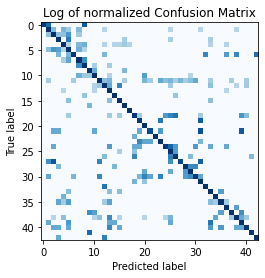

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.log(.0001 + cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Log of normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

14


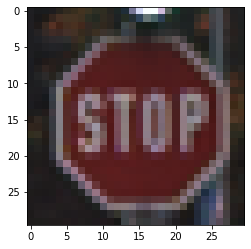

In [49]:
plt.imshow(X_test[456]) 

classNo = int(model.predict_classes(X_test[456].reshape(1, 30, 30, 3)))
print(classNo)

In [50]:
def getCalssName(classNo):
  if   classNo == 0: return 'Speed Limit 20 km/h'
  elif classNo == 1: return 'Speed Limit 30 km/h'
  elif classNo == 2: return 'Speed Limit 50 km/h'
  elif classNo == 3: return 'Speed Limit 60 km/h'
  elif classNo == 4: return 'Speed Limit 70 km/h'
  elif classNo == 5: return 'Speed Limit 80 km/h'
  elif classNo == 6: return 'End of Speed Limit 80 km/h'
  elif classNo == 7: return 'Speed Limit 100 km/h'
  elif classNo == 8: return 'Speed Limit 120 km/h'
  elif classNo == 9: return 'No passing'
  elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
  elif classNo == 11: return 'Right-of-way at the next intersection'
  elif classNo == 12: return 'Priority road'
  elif classNo == 13: return 'Yield'
  elif classNo == 14: return 'Stop'
  elif classNo == 15: return 'No vechiles'
  elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
  elif classNo == 17: return 'No entry'
  elif classNo == 18: return 'General caution'
  elif classNo == 19: return 'Dangerous curve to the left'
  elif classNo == 20: return 'Dangerous curve to the right'
  elif classNo == 21: return 'Double curve'
  elif classNo == 22: return 'Bumpy road'
  elif classNo == 23: return 'Slippery road'
  elif classNo == 24: return 'Road narrows on the right'
  elif classNo == 25: return 'Road work'
  elif classNo == 26: return 'Traffic signals'
  elif classNo == 27: return 'Pedestrians'
  elif classNo == 28: return 'Children crossing'
  elif classNo == 29: return 'Bicycles crossing'
  elif classNo == 30: return 'Beware of ice/snow'
  elif classNo == 31: return 'Wild animals crossing'
  elif classNo == 32: return 'End of all speed and passing limits'
  elif classNo == 33: return 'Turn right ahead'
  elif classNo == 34: return 'Turn left ahead'
  elif classNo == 35: return 'Ahead only'
  elif classNo == 36: return 'Go straight or right'
  elif classNo == 37: return 'Go straight or left'
  elif classNo == 38: return 'Keep right'
  elif classNo == 39: return 'Keep left'
  elif classNo == 40: return 'Roundabout mandatory'
  elif classNo == 41: return 'End of no passing'
  elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

sign=getCalssName(classNo)
print("The detected sign is {}".format(sign))

The detected sign is Stop
